In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Dense

In [20]:
files_idle_wheel = [fn for fn in glob.glob('../new_threshold/idle_wheel_/moving_variance/*.csv', recursive=True)]
files_drive_wheel = [fn for fn in glob.glob('../new_threshold/drive_wheel/**/*.csv', recursive=True)]
files_lifting_motor = [fn for fn in glob.glob('../new_threshold/lifting_motor/**/*.csv', recursive=True)]

In [21]:
## CONVERT TO DATAFRAMES
idle_wheel_mvg_var = [pd.read_csv(file) for file in files_idle_wheel]

drive_wheel_mvg_var = [pd.read_csv(file) for file in sorted(files_drive_wheel[:7])]
drive_wheel_raw = [pd.read_csv(file) for file in sorted(files_drive_wheel[7:])]

lifting_motor_mvg_var = [pd.read_csv(file) for file in sorted(files_lifting_motor[:7])]
lifting_motor_raw = [pd.read_csv(file) for file in sorted(files_lifting_motor[7:])]

In [12]:
def gen_data(lst):
    """
    """
    features = []
    labels = []
    for df in lst:
        f = np.array(df.iloc[:,1:11])
        l = np.array(df.iloc[:,11].astype(int))
        features.append(f)
        labels.append(l)
        
        feature_output = np.concatenate(features)
        
    return feature_output.reshape(feature_output.shape[0], feature_output.shape[1], 1), np.concatenate(labels)
        

In [13]:
x_train, y_train = gen_data(idle_wheel_mvg_var)

dw_x_1, dw_y_1 = gen_data(drive_wheel_mvg_var)
dw_x_2, dw_y_2 = gen_data(drive_wheel_mvg_var)
dw_x_3, dw_y_3 = gen_data(drive_wheel_mvg_var)
dw_x_4, dw_y_4 = gen_data(drive_wheel_mvg_var)
dw_x_5, dw_y_5 = gen_data(drive_wheel_mvg_var)
dw_x_6, dw_y_6 = gen_data(drive_wheel_mvg_var)
dw_x_7, dw_y_7 = gen_data(drive_wheel_mvg_var)

lm_x_1, lm_y_1 = gen_data(lifting_motor_mvg_var)
lm_x_2, lm_y_2 = gen_data(lifting_motor_mvg_var)
lm_x_3, lm_y_3 = gen_data(lifting_motor_mvg_var)
lm_x_4, lm_y_4 = gen_data(lifting_motor_mvg_var)
lm_x_5, lm_y_5 = gen_data(lifting_motor_mvg_var)
lm_x_6, lm_y_6 = gen_data(lifting_motor_mvg_var)
lm_x_7, lm_y_7 = gen_data(lifting_motor_mvg_var)

In [146]:
model = Sequential()
model.add(LSTM(100, input_shape=(10,1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 51,921
Trainable params: 51,921
Non-trainable params: 0
_________________________________________________________________
None


Training

In [147]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
11376/11376 [==============================] - 5s 435us/step - loss: 0.1041
Epoch 2/10
11376/11376 [==============================] - 4s 323us/step - loss: 0.0390
Epoch 3/10
11376/11376 [==============================] - 4s 356us/step - loss: 0.0381
Epoch 4/10
11376/11376 [==============================] - 4s 315us/step - loss: 0.0419
Epoch 5/10
11376/11376 [==============================] - 4s 311us/step - loss: 0.0368
Epoch 6/10
11376/11376 [==============================] - 4s 324us/step - loss: 0.0360
Epoch 7/10
11376/11376 [==============================] - 4s 325us/step - loss: 0.0366
Epoch 8/10
11376/11376 [==============================] - 4s 318us/step - loss: 0.0320
Epoch 9/10
11376/11376 [==============================] - 4s 324us/step - loss: 0.0334
Epoch 10/10
11376/11376 [==============================] - 4s 320us/step - loss: 0.0356


In [14]:
def predict(model, test_data, test_label):
    """
    """
    pred = model.predict(test_data)
    pred = pred.round()
    try:
        tn, fp, fn, tp = confusion_matrix(pred.flatten(), test_label).ravel()
    except:
        tn = 0
        fp = 0
        fn = 0
        tp = 0
    
    acc = (pred.flatten() == test_label.flatten()).sum()/ len(test_label)
    f1 = f1_score(pred, test_label)  
    pred_conc = np.concatenate([np.zeros(10),pred.flatten()])
    return {
        'pred': pred.flatten(),
        'pred_conc':pred_conc,
        'conf_mat': (tn, fp, fn, tp),
        'acc': acc,
        'f1': f1
    }

In [185]:
pred_dw_1=predict(model, dw_x_1, dw_y_1)
pred_dw_2=predict(model, dw_x_2, dw_y_2)
pred_dw_3=predict(model, dw_x_3, dw_y_3)
pred_dw_4=predict(model, dw_x_4, dw_y_4)
pred_dw_5=predict(model, dw_x_5, dw_y_5)
pred_dw_6=predict(model, dw_x_6, dw_y_6)
pred_dw_7=predict(model, dw_x_7, dw_y_7)

pred_lm_1=predict(model, lm_x_1, lm_y_1)
pred_lm_2=predict(model, lm_x_2, lm_y_2)
pred_lm_3=predict(model, lm_x_3, lm_y_3)
pred_lm_4=predict(model, lm_x_4, lm_y_4)
pred_lm_5=predict(model, lm_x_5, lm_y_5)
pred_lm_6=predict(model, lm_x_6, lm_y_6)
pred_lm_7=predict(model, lm_x_7, lm_y_7)

In [203]:
def predict_plot(raw, pred, actual, title, axes):
    """
    """
    raw['realvalue'].plot(ax=axes)
    raw['Moving_variance'].plot(ax=axes)
    pd.Series(pred['pred_conc']).plot(ax=axes )
    pd.Series(actual).plot(ax=axes)
    axes.set_title('%s \n Accuracy: %f F1: %f'% (title, pred['acc'],pred['f1']) + '\n tn: %2.f fp: %2.f fn: %2.f tp: %2.f' % (pred['conf_mat'][0], pred['conf_mat'][1], pred['conf_mat'][2],pred['conf_mat'][3] ) )
    axes.legend(['raw data', 'moving variance', 'prediction', 'actual label'],loc='upper right')

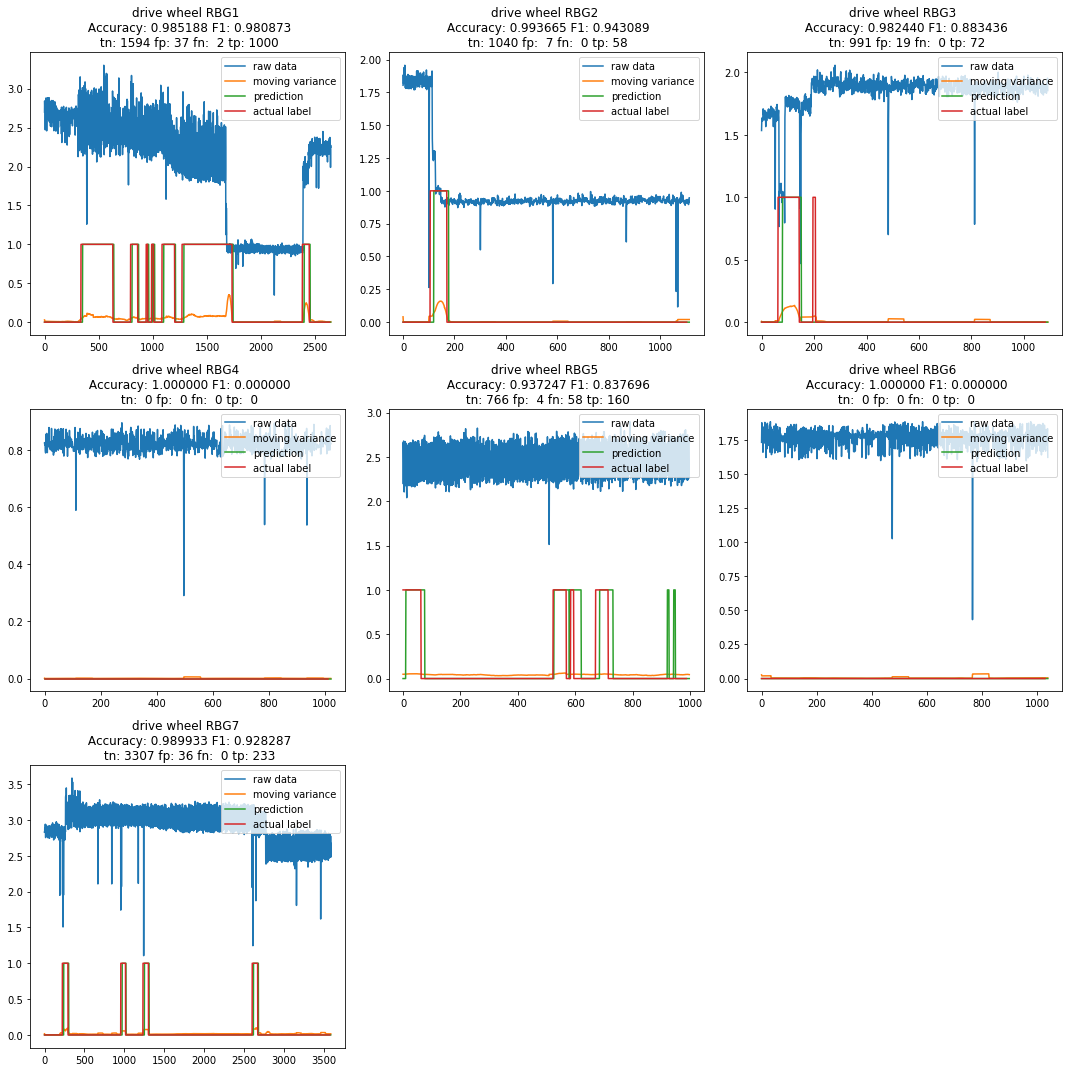

In [204]:
# drive wheel
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,15))

predict_plot(raw_drive_wheel_1, pred_dw_1, dw_y_1, 'drive wheel RBG1', axes = axes[0,0])
predict_plot(raw_drive_wheel_2, pred_dw_2, dw_y_2, 'drive wheel RBG2', axes = axes[0,1])
predict_plot(raw_drive_wheel_3, pred_dw_3, dw_y_3, 'drive wheel RBG3', axes = axes[0,2])
predict_plot(raw_drive_wheel_4, pred_dw_4, dw_y_4, 'drive wheel RBG4', axes = axes[1,0])
predict_plot(raw_drive_wheel_5, pred_dw_5, dw_y_5, 'drive wheel RBG5', axes = axes[1,1])
predict_plot(raw_drive_wheel_6, pred_dw_6, dw_y_6, 'drive wheel RBG6', axes = axes[1,2])
predict_plot(raw_drive_wheel_7, pred_dw_7, dw_y_7, 'drive wheel RBG7', axes = axes[2,0])
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.tight_layout()

To validate our model, we train our model using Idle wheel data from all the machine, and we perform prediction on drive wheel and lifting motor. 

We hypothesise that our model can generalzie across machines. We test this against the drive_wheel sensor.


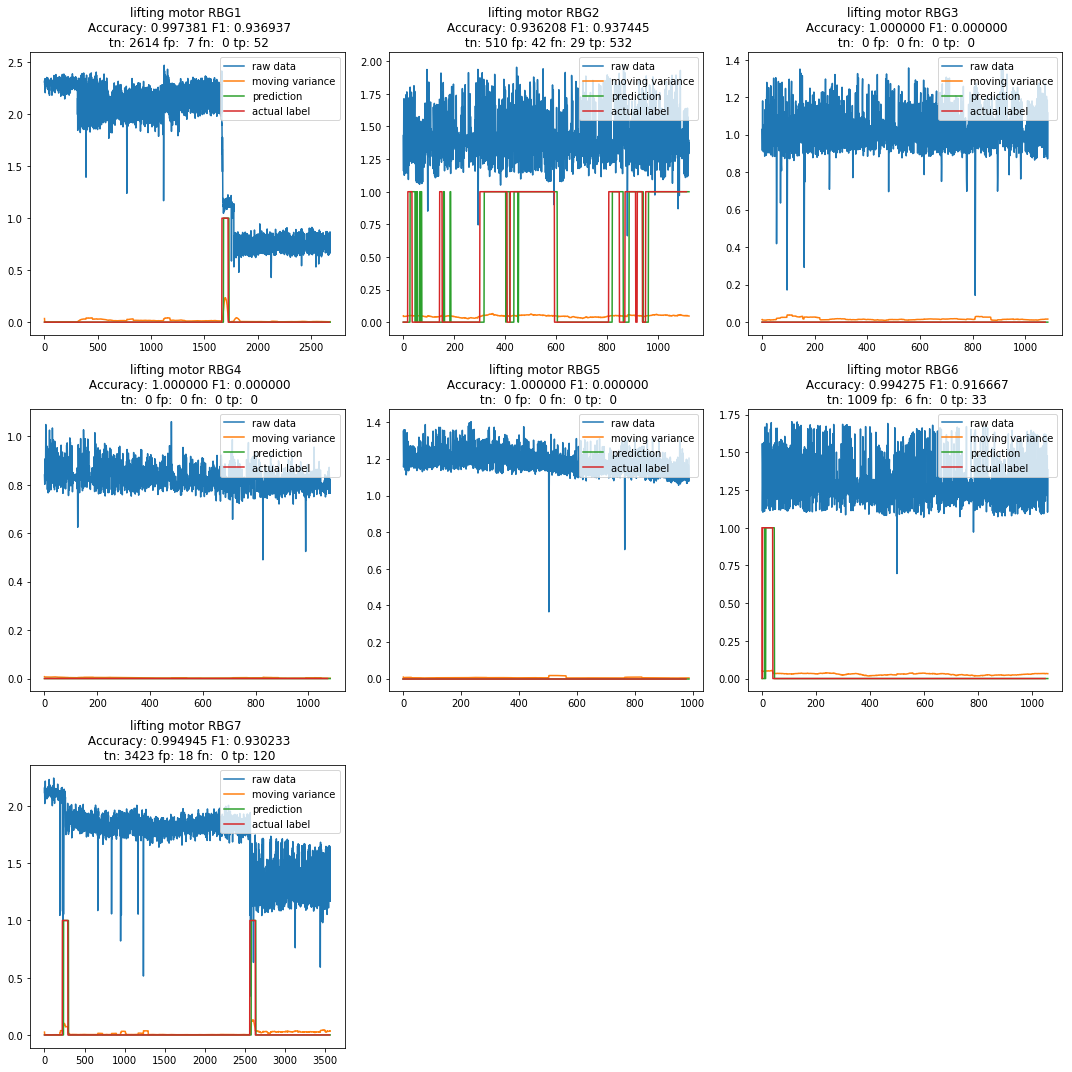

In [205]:
# lifting motor

# drive wheel
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,15))

predict_plot(raw_lifting_motor_1, pred_lm_1, lm_y_1, 'lifting motor RBG1', axes = axes[0,0])
predict_plot(raw_lifting_motor_2, pred_lm_2, lm_y_2, 'lifting motor RBG2', axes = axes[0,1])
predict_plot(raw_lifting_motor_3, pred_lm_3, lm_y_3, 'lifting motor RBG3', axes = axes[0,2])
predict_plot(raw_lifting_motor_4, pred_lm_4, lm_y_4, 'lifting motor RBG4', axes = axes[1,0])
predict_plot(raw_lifting_motor_5, pred_lm_5, lm_y_5, 'lifting motor RBG5', axes = axes[1,1])
predict_plot(raw_lifting_motor_6, pred_lm_6, lm_y_6, 'lifting motor RBG6', axes = axes[1,2])
predict_plot(raw_lifting_motor_7, pred_lm_7, lm_y_7, 'lifting motor RBG7', axes = axes[2,0])
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.tight_layout()